In [1]:
import sys
print(sys.path)
sys.path.append("../mpc")
from lqr_recursion import LqrRecursion
import chainer
import numpy as np
import matplotlib.pyplot as plt

['/Users/i19_arahata/Program/chainer-mpc/examples', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python37.zip', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/lib-dynload', '/Users/i19_arahata/.pyenv/versions/3.7.2/lib/python3.7', '', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages/IPython/extensions', '/Users/i19_arahata/.ipython']


/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages/chainer/_environment_check.py:41: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Please be aware that Mac OS X is not an officially supported OS.

  ''')  # NOQA


In [2]:
T = 100
f = None
n_state =4
n_ctrl =2
n_sc = n_ctrl +n_state
F =chainer.Variable(np.array([(np.array([
    [0.99, 0.03, -0.02, -0.32, 0.01, 0.99],
    [0.01,0.47, 4.7, 0.0, -3.44, 1.66],
    [0.02, -0.06, 0.40, -0.0, -0.83, 0.44],
   [0.01, -0.04, 0.72, 0.99, -0.47, 0.25]]))for i in range(T)])).reshape(T,1,n_state,n_sc,)
c = chainer.Variable(np.array([(np.array([0, 0, 0.0, 0, 0, 0]).T) for i in range(T)])).reshape(T,1,n_sc,)
C = chainer.Variable(np.array([np.array([
    [1, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [0, 0, 0, 1.0,0,0],
    [ 0, 0, 0, 0, 100,0],
    [0, 0, 0, 0, 0,100]]) for i in range(T)])).reshape(T,1,n_sc, n_sc)
x_init = chainer.Variable(np.array([0,0, 0, 1.0])).reshape(1,n_state)

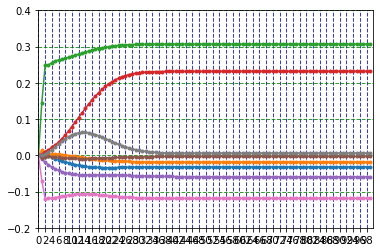

In [17]:
test = LqrRecursion(x_init,C,c,F,f,T,n_state,n_ctrl)
Ks, ks = test.backward()
k1 = []
k2 = []
k3 = []
k4 = []
k5 = []
k6 = []
k7 = []
k8 = []
for i in range(T):
    k1.append(Ks[i][0][0][0].data)
    k2.append(Ks[i][0][0][1].data)
    k3.append(Ks[i][0][0][2].data)
    k4.append(Ks[i][0][0][3].data)
    k5.append(Ks[i][0][1][0].data)
    k6.append(Ks[i][0][1][1].data)
    k7.append(Ks[i][0][1][2].data)
    k8.append(Ks[i][0][1][3].data)

k1.reverse()
k2.reverse()
k3.reverse()
k4.reverse()
k5.reverse()
k6.reverse()
k7.reverse()
k8.reverse()
fig, ax = plt.subplots()
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)

# y軸に目盛線を設定
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)

ax.set_ylim(-0.2, 0.4)
ax.set_xlim(0, T)
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)

# y軸に目盛線を設定
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)
major_ticks = np.arange(0, 100, 2)                                              
ax.set_xticks(major_ticks)            
ax.plot(k1, marker='.')
ax.plot(k2, marker='.')
ax.plot(k3, marker='.')
ax.plot(k4, marker='.')
ax.plot(k5, marker='.')
ax.plot(k6, marker='.')
ax.plot(k7, marker='.')
ax.plot(k8, marker='.')
plt.show()

In [4]:
x,u = test.solve_recursion()

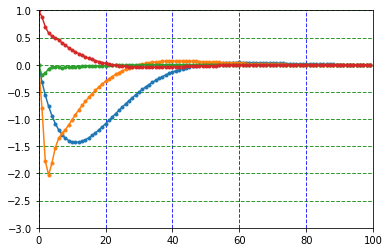

In [8]:
x1 = []
x2 = []
x3 = []
x4= []
for i in range(T):
    x1.append(x[i][0][0].data)
    x2.append(x[i][0][1].data)
    x3.append(x[i][0][2].data)
    x4.append(x[i][0][3].data)
fig, ax = plt.subplots()
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)

# y軸に目盛線を設定
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)

ax.set_ylim(-3, 1)
ax.set_xlim(0, T)
ax.plot(x1, marker='.')
ax.plot(x2, marker='.')
ax.plot(x3, marker='.')
ax.plot(x4, marker='.')
plt.show()

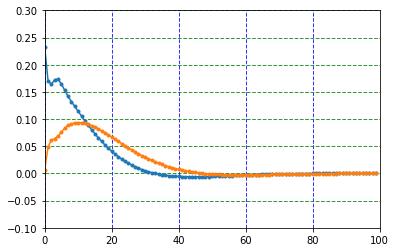

In [11]:
u1 = []
u2 = []

for i in range(T):
    u1.append(u[i][0][0].data)
    u2.append(u[i][0][1].data)

fig, ax = plt.subplots()
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)

# y軸に目盛線を設定
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)

ax.set_ylim(-0.1, 0.3)
ax.set_xlim(0, T)
ax.plot(u1, marker='.')
ax.plot(u2, marker='.')
plt.show()